In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

####  Breast cancer data
*   diagnosis war first binary classification output , with M, F .so i change the caractere classification into 0,1 

In [135]:
cancer_data=pd.read_csv("Datasets\cancerbreast.csv")
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### clean the data
* drop 'id' column because it's not an importance feature.
*  drop  unamed32 because it's  not a n importance feature.
* if we have null value, we should replace each null value with 0 and here the workflow.




In [136]:
cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)
#cancer_data=cancer_data.replace([np.inf,-np.inf],np.nan)
#cancer_data=cancer_data.fillna(0)
#cancer_data=cancer_data.isna().sum()



#### get more information about the data
* shape von cancer_data
* cancer_data description
* unique(): gives information about the value of input(diagnosis has ---->(['M', 'B'])
* has my cancer data null value
* how many 1 and 0 do i have in my output variable(diagnosis)


In [76]:
#print(' shape my cancer data is :',len(cancer_data))
#print('description :',cancer_data.describe())
#print(' the value of my output variable are :',cancer_data.diagnosis.unique())
#print('has my data null value',cancer_data.isna().sum())
#print('how many 1 and 0 do i have in my output variable: \n ',cancer_data.diagnosis.value_counts())

####  Data_ Visualization:

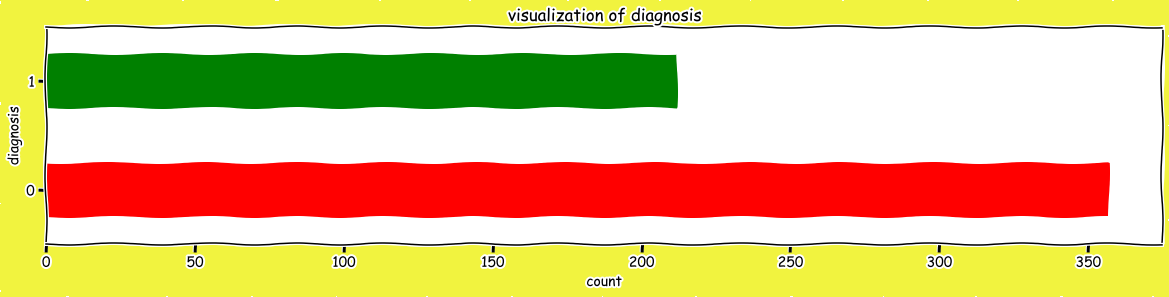

In [84]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#f1f33f')
    cancer_data.diagnosis.value_counts().plot(kind='barh',color=['red','green'])
    
    plt.title('visualization of diagnosis')
    plt.xlabel('count')
    plt.ylabel('diagnosis')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

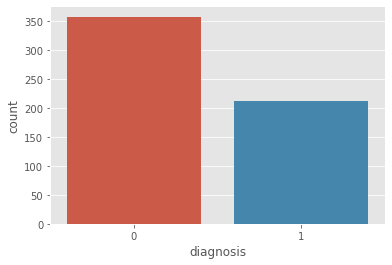

In [106]:
sns.countplot(cancer_data['diagnosis'])

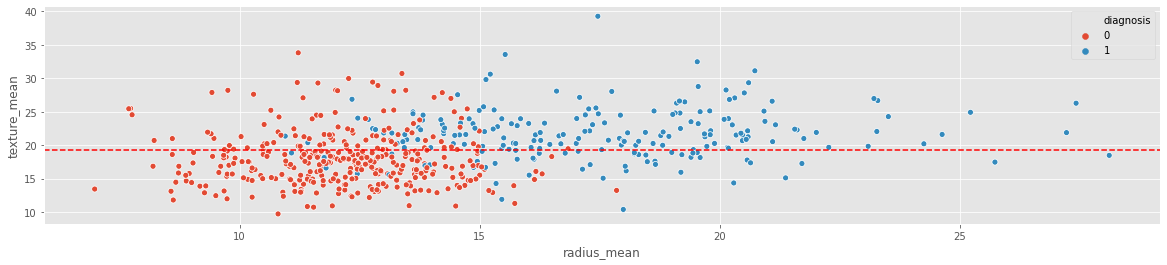

In [96]:
plt.figure(figsize=(20,4))
sns.scatterplot(cancer_data['radius_mean'],cancer_data['texture_mean'],hue=cancer_data['diagnosis'])
plt.xlabel('radius_mean')   
plt.ylabel('texture_mean')
plt.axhline(cancer_data['texture_mean'].mean(),linestyle='--',color='red')
plt.grid('True')
plt.style.use('ggplot')



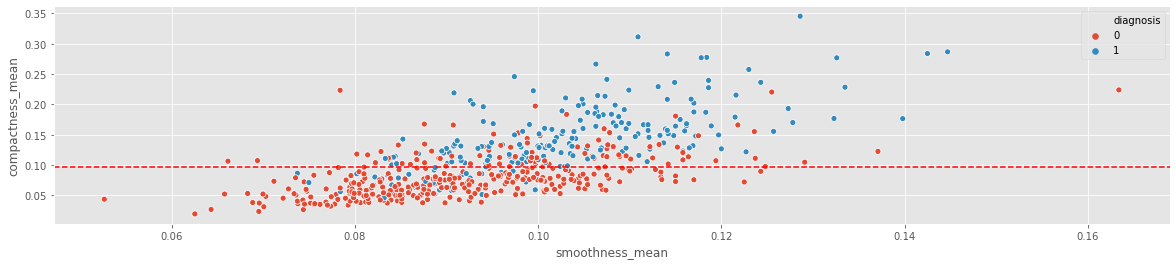

In [101]:

plt.figure(figsize=(20,4))
sns.scatterplot(cancer_data['smoothness_mean'],cancer_data['compactness_mean'],hue=cancer_data['diagnosis'])
plt.axhline(cancer_data ['smoothness_mean'].mean(),linestyle='--',color='red')
plt.xlabel('smoothness_mean')
plt.ylabel('compactness_mean')
plt.grid('true')
plt.style.use('ggplot')

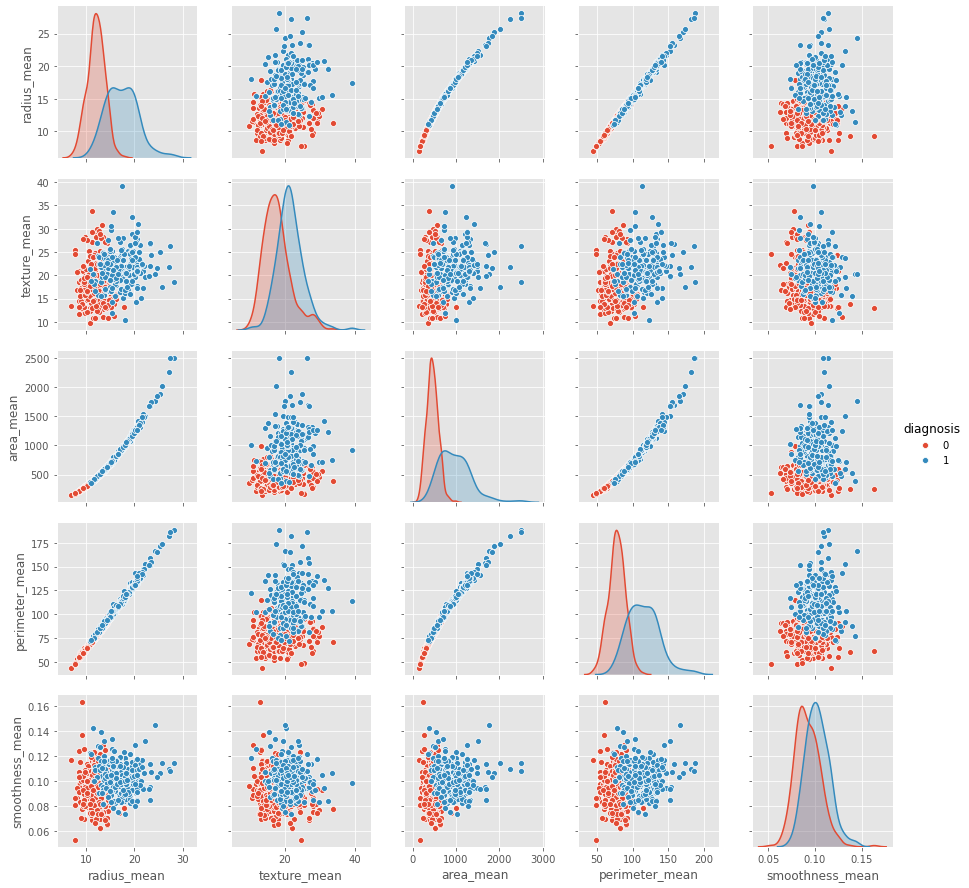

In [104]:

sns.pairplot(cancer_data,hue='diagnosis',vars=['radius_mean','texture_mean','area_mean','perimeter_mean','smoothness_mean'])

##### let's check the correlation between the features:

<AxesSubplot:>

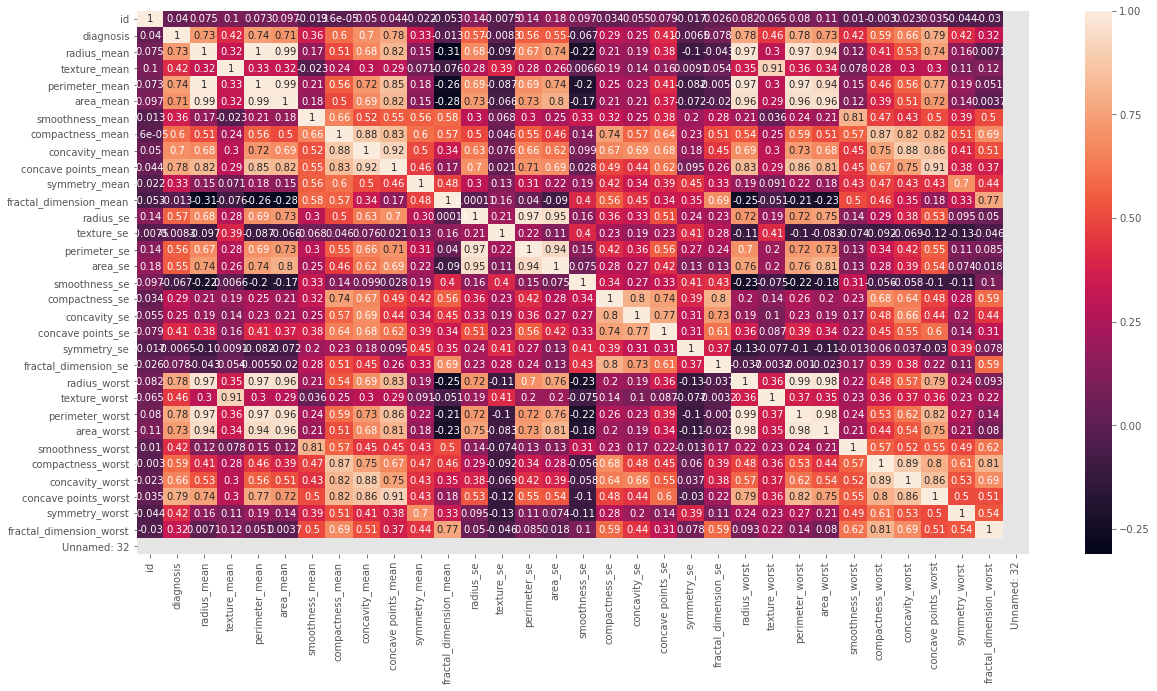

In [108]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer_data.corr(),annot=True)

#### Model Training :
* split input and output for each other
*  split training and testing data for each other


In [159]:
x=cancer_data.drop(['diagnosis'],axis=1)
y=cancer_data['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(455, 30)
(114, 30)
(114,)
(455,)


* using svm for classification model

In [144]:
svc_model= SVC()
svc_model.fit(x_train,y_train)


SVC()

* prediction:

In [153]:
y_pred=svc_model.predict(x_test)
print(y_pred)




[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


* using confusion matrix to have a general view about TP;TN;FP;FN
* Tp : is 71  which a good value
* FP : we called also type error 1 ,  the model has it also gut classified
* FN * is 6  we should improve the model to give better classification in this case , beacause 6=type error 2 , which is not gut
* TN is also gut classified

<AxesSubplot:>

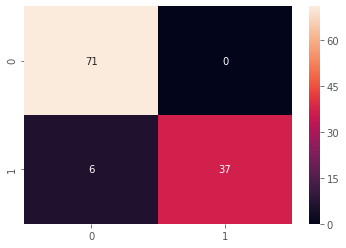

In [157]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [158]:
### classification report:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### improving the model: part 1
* Data preprocessing
* splitting  the data again 
* fitting the model
* Evaluating the Model

In [187]:
x_preprocessing=preprocessing.StandardScaler().fit(x).transform(x)

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x_preprocessing,y,test_size=0.2,random_state=42)

In [189]:
svc_model.fit(x_train,y_train)

SVC()

In [190]:
y_pred=svc_model.predict(x_test)

<AxesSubplot:>

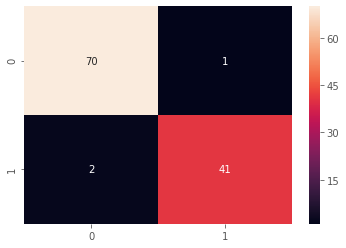

In [191]:
cm_pre=confusion_matrix(y_test,y_pred)
sns.heatmap(cm_pre,annot=True)

In [185]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Improving the model : part 2
* in this chapter we should updtae the hyperparameter.

In [203]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.1,0.01,0.001,0.000001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.934 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.758 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 1e-06],
                         'kernel': ['rbf']},
             verbose=4)

* show the y_predicted after updating the hyperparamter
* show the confusion matrix after updating the hyperparameter
* Classification_ report

AxesSubplot(0.125,0.125;0.62x0.755)


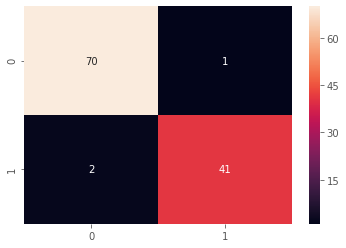

In [205]:
y_pre_grid=svc_model.predict(x_test)
cm_grid=confusion_matrix(y_test,y_pre_grid)
print(sns.heatmap(cm_grid,annot=True))


In [206]:
print(classification_report(y_test,y_pre_grid))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Conclusion :
* Machine Learning techniques (SVM) was able to classify tumors into Malignant / Benign with 97% accuracy.

* Early breast cancer can dramatically save lives especially in the developing world

* The technique can be further improved by combining Computer Vision/ ML techniques to directly classify cancer using tissue images.